# Predicting Diabetes

## Using only one input variable

### Paulo C. Rios Jr.  | Oct 23, 2017

### Exercício - Melhore a modelagem

1. Divida o conjunto em train e test sets aleatoriamente usando 20% para teste e veja como ficou agora a modelagem

2. Visualize a modelagem no conjunto de treinamento

3. Use validação cruzada e veja como fica agora a modelagem

4. Use todos as variáveis, repita os passos acima e veja como ficou agora a modelagem


1. Divide the set into train and test sets randomly using 20% to test and see how the modeling has now been.

2. View the modeling in the training set.

3. Use cross-validation and see how the modeling is now.

4. Use all variables, repeat the steps above and see how the modeling was now.


## 1. Import Packages

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

## 2. Read the data

In [4]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [5]:
diabetes.keys()

dict_keys(['data', 'target'])

## 3. Assign X and y

In [6]:
# Use only ONE feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_y = diabetes.target

## 4. Split the data into train and test sets

In [7]:
# Split the targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, 
                                                    diabetes_y, 
                                                    test_size=0.25, 
                                                    random_state=1)

## 5. Apply a Simple Linear Model

In [8]:
# Create linear regression object
lm = linear_model.LinearRegression()

In [9]:
# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 6. Cross-Validate the Model

In [10]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1015.81069855]


In [49]:
cross_val_score?

In [12]:
cv_score = cross_val_score(lm, X_train, y_train, cv=5 )
cv_score

array([ 0.27199744,  0.42493804,  0.44249168,  0.33002527,  0.34812724])

In [42]:
cv_score_train_mean =  np.mean(cv_score)
cv_score_train_mean

0.36351593315977249

## 7. Cross-Validate the Model Predictions

In [31]:
# Make cross-validated predictions
y_train_pred_cv = cross_val_predict(lm, X_train, y_train, cv=5)

In [51]:
# The mean squared error
validation_mse = mean_squared_error(y_train, y_train_pred_cv)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_pred_cv))

Mean squared error: 3822.59


In [61]:
# Explained variance score: 1 is perfect prediction
validation_r2_score = r2_score(y_train, y_train_pred_cv)
print('Variance score: %.2f' % r2_score(y_train, 
                                        y_train_pred_cv))

Variance score: 0.38


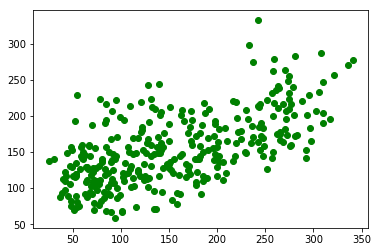

In [57]:
plt.scatter(y_train, y_train_pred_cv, color = "green")
plt.show()

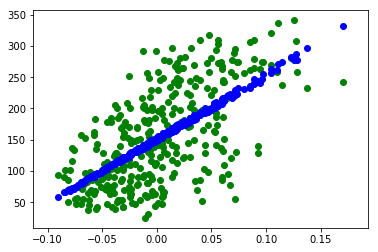

In [58]:
# Plot outputs
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_train, y_train_pred_cv, color='blue')
plt.show()

## 8. Test the Model

In [24]:
# Make predictions using the testing set
y_test_pred = lm.predict(X_test)

In [50]:
# The mean squared error
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))

Mean squared error: 4309.22


In [59]:
# Explained variance score: 1 is perfect prediction
test_r2_score = r2_score(y_test,y_test_pred)
print('Variance score: %.2f' % r2_score(y_test, 
                                        y_test_pred))

Variance score: 0.17


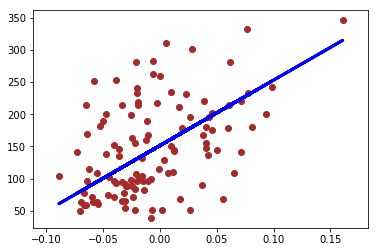

In [54]:
# Plot outputs
plt.scatter(X_test, y_test,  color='brown')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.show()

## 9. Comparison Validation and Test

In [62]:
comparison = {"Validation" : [validation_mse,validation_r2_score],
             "Test": [test_mse, test_r2_score]}
pd.DataFrame(comparison, index = ["MSE Score", "R2 Score"])

,Test,Validation
MSE Score,4309.221213,3822.587004
R2 Score,0.174662,0.379282
